In [80]:
import numpy as np
import scipy.stats as sps
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix
import pylab as p
%matplotlib inline

## Research question:
What interventions types that budget allocated to might have the greatest effectiveness for preventing and reducing the prevalence of obesity in children?

In [81]:
df = pd.read_csv('coursework_1_data_2019.csv')
print(len(df))
df.head()

152


,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,...,2018_pop_female,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type
0,Barking and Dagenham,593,619,763,172684,179030,181779,187,190,230,...,103796,139000,21000,22000,18000,41000,18000,19000,London,london_borough
1,Barnet,539,594,773,340435,344062,355955,212,204,292,...,194186,220000,50000,17000,23000,74000,30000,26000,London,london_borough
2,Barnsley,360,451,527,226755,244010,257883,148,186,212,...,130828,160000,41000,45000,5000,26000,29000,14000,Yorkshire and the Humber,metropolitan_borough
3,Bath and North East Somerset,456,421,494,178625,172975,189334,157,129,156,...,98444,161000,33000,42000,19000,50000,10000,7000,South West,unitary_authority
4,Bedford,311,327,367,158185,164807,170463,138,145,156,...,87854,130000,37000,52000,17000,8000,3000,13000,East of England,unitary_authority


In [82]:
cols = list(df.columns)

In [83]:
# annual growth rate within 10 years
def grow_rate(final, initial, duration):
    rate = (final/initial)**(1/duration)-1
    return rate

In [84]:
# create new columns in df
df[['male_2008_ratio', 'male_2018_ratio', 'male_growrate',
    'female_2008_ratio', 'female_2018_ratio', 'female_growrate',
    'cases_2008_ratio', 'cases_2018_ratio', 'total_growrate']] = 0.0


In [85]:
# prevalence of obesity of total, male and female. Annual rate of growth of total, male and female
for i in range(len(df)):
    df['cases_2008_ratio'][i] = df.loc[:,['2008_cases_total']].iloc[i,0] / df.loc[:,['2008_pop_total']].iloc[i,0]
    df['cases_2018_ratio'][i] = df.loc[:,['2018_cases_total']].iloc[i,0] / df.loc[:,['2018_pop_total']].iloc[i,0]
    df['male_2008_ratio'][i] = df.loc[:,['2008_cases_male']].iloc[i,0] / df.loc[:,['2008_pop_male']].iloc[i,0]
    df['male_2018_ratio'][i] = df.loc[:,['2018_cases_male']].iloc[i,0] / df.loc[:,['2018_pop_male']].iloc[i,0]
    df['female_2008_ratio'][i] = df.loc[:,['2008_cases_female']].iloc[i,0] / df.loc[:,['2008_pop_female']].iloc[i,0]
    df['female_2018_ratio'][i] = df.loc[:,['2018_cases_female']].iloc[i,0] / df.loc[:,['2018_pop_female']].iloc[i,0]
    df['total_growrate'][i] = grow_rate(df.loc[:,['2018_cases_total']].iloc[i,0], df.loc[:,['2008_cases_total']].iloc[i,0], 10)
    df['male_growrate'][i] = grow_rate(df.loc[:,['male_2018_ratio']].iloc[i,0], df.loc[:,['male_2008_ratio']].iloc[i,0], 10)
    df['female_growrate'][i] = grow_rate(df.loc[:,['female_2018_ratio']].iloc[i,0], df.loc[:, ['female_2008_ratio']].iloc[i,0], 10)


/tmp/ipykernel_67/1232815792.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cases_2008_ratio'][i] = df.loc[:,['2008_cases_total']].iloc[i,0] / df.loc[:,['2008_pop_total']].iloc[i,0]
/tmp/ipykernel_67/1232815792.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cases_2018_ratio'][i] = df.loc[:,['2018_cases_total']].iloc[i,0] / df.loc[:,['2018_pop_total']].iloc[i,0]
/tmp/ipykernel_67/1232815792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [86]:
# hypothesis testing between 2008 and 2018
# total 0.027, male 0.028, female 0.052
x1_values = df['cases_2008_ratio']
x2_values = df['cases_2018_ratio']

# These lines remove blank entries:
x1_values = np.array([a for a in x1_values if not np.isnan(a)])
x2_values = np.array([a for a in x2_values if not np.isnan(a)])

# These lines perform the comparison of means t-test:
tval, pval_mct = sps.ttest_ind(x1_values,x2_values,equal_var=True)

# These lines perform the KS test:
KSstat, pval_KS = sps.ks_2samp(x1_values,x2_values)

# Print the p-values:
print("The mean comparison t-test p-value =", pval_mct)
print("The KS test p-value =", pval_KS)


The mean comparison t-test p-value = 0.027888280286753903
The KS test p-value = 0.02325225501139328


In [87]:
df_2 = pd.concat([df, pd.get_dummies(df['local_authority_type'])], axis = 1)
df_descr = df_2[['total_growrate', 'male_growrate', 'female_growrate', 'total_budget', 'clean_air',
                      'clean_environ', 'health_training','school_awareness', 'media_awareness', 'sub_counselling', ]]

In [88]:
df_descr.describe()

,total_growrate,male_growrate,female_growrate,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling
count,152.000000,152.000000,152.000000,1.520000e+02,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,0.018380,0.011482,0.011950,2.703092e+05,59368.421053,68427.631579,25111.842105,62631.578947,32967.105263,21802.631579
std,0.011060,0.015208,0.009079,2.104618e+05,53980.948836,62114.997173,22815.281663,55056.104342,29930.253972,19832.423607
min,-0.028358,-0.092121,-0.002716,2.000000e+03,0.000000,0.000000,0.000000,2000.000000,0.000000,0.000000
25%,0.012818,0.003825,0.005573,1.400000e+05,26000.000000,32000.000000,11750.000000,31750.000000,14000.000000,9000.000000
50%,0.018110,0.010204,0.009970,2.000000e+05,41500.000000,48000.000000,18000.000000,45000.000000,25000.000000,16000.000000
75%,0.024280,0.020248,0.016597,3.017500e+05,70000.000000,79000.000000,26500.000000,69750.000000,39750.000000,27250.000000
max,0.051044,0.048097,0.054177,1.170000e+06,297000.000000,333000.000000,130000.000000,340000.000000,203000.000000,99000.000000


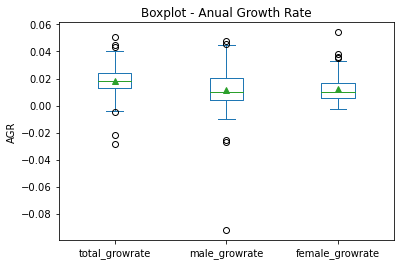

In [89]:
df_descr.iloc[:,0:3].plot.box(showmeans = True)
plt.ylabel('AGR', fontsize =10)
plt.title('Boxplot - Anual Growth Rate')
plt.savefig('Box Plot of Anual Growth rate')

In [90]:
# examine the outliers
df[df_descr['male_growrate']<-0.02]['local_authority_area']

25      City of London
59     Isles of Scilly
105            Rutland
Name: local_authority_area, dtype: object

In [91]:
# exclude 3 outliers that have cases_mean less than 100.
df_2[['cases_mean']] = 0.0
for i in range(len(df_2)):
    df_2['cases_mean'][i] = np.mean(df_2.iloc[i,1:4])
df_2.drop(df_2[df_2['cases_mean']<100].index, axis = 0, inplace = True)
df_2 = df_2.reset_index(drop = True)


/tmp/ipykernel_67/2670399460.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['cases_mean'][i] = np.mean(df_2.iloc[i,1:4])


In [92]:
# create a new dataframe containing all the variables and dependent variables
df_growrate = df_2[['total_growrate', 'male_growrate', 'female_growrate', 'total_budget', 'clean_air','clean_environ', 'health_training',
                  'school_awareness', 'media_awareness', 'sub_counselling', 
                  'london_borough', 'metropolitan_borough', 'non_metropolitan_county', 'unitary_authority']]


Text(0.5, 1.0, 'Box Plot of growth rate')

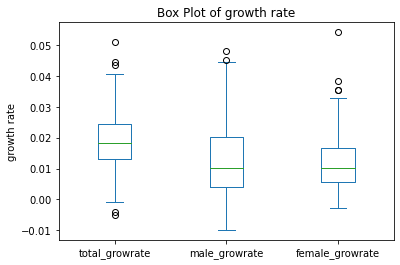

In [93]:
# generate boxplot again to check the new outliers
df_growrate.iloc[:,0:3].plot.box()
plt.ylabel('growth rate', fontsize =10)
plt.title('Box Plot of growth rate')


In [94]:
# normality test
for i in range(df_growrate.columns.size):
    k2, pvalue = sps.normaltest(df_growrate.iloc[:,i], axis=0)
    if pvalue > 0.05:
        print('cannot decide whether', df_growrate.columns.tolist()[i], 'is normal distributed', ', pvalue = ', pvalue, ', k2 = ', k2)
    elif pvalue <= 0.05:
        print(df_growrate.columns.tolist()[i], 'is not normal distributed',  ', pvalue = ', pvalue, ', k2 = ', k2)


total_growrate is not normal distributed , pvalue =  0.024911815614892578 , k2 =  7.384826130750625
male_growrate is not normal distributed , pvalue =  0.0115940230670272 , k2 =  8.914531133001324
female_growrate is not normal distributed , pvalue =  5.465123564614796e-10 , k2 =  42.65492839678204
total_budget is not normal distributed , pvalue =  2.459691057787772e-18 , k2 =  81.0929918362006
clean_air is not normal distributed , pvalue =  5.4848376357713986e-17 , k2 =  74.88391817821983
clean_environ is not normal distributed , pvalue =  2.0537526586978402e-17 , k2 =  76.84855579194519
health_training is not normal distributed , pvalue =  4.2907933072083684e-19 , k2 =  84.58529026189473
school_awareness is not normal distributed , pvalue =  7.699304128102668e-22 , k2 =  97.23148418813386
media_awareness is not normal distributed , pvalue =  7.920892528513563e-21 , k2 =  92.56956612080774
sub_counselling is not normal distributed , pvalue =  8.881252674073879e-17 , k2 =  73.9200079338

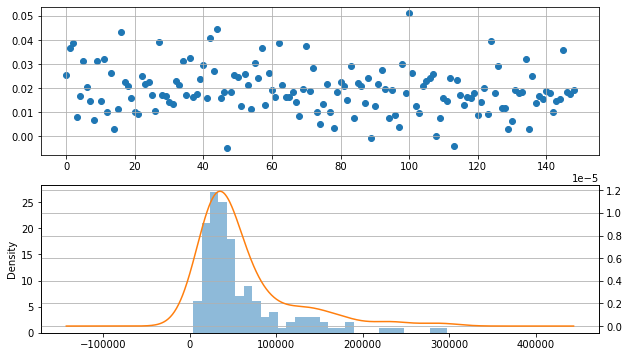

In [95]:
# see the histograms to check the distribution
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)
ax1.scatter(df_growrate['total_growrate'].index, df_growrate['total_growrate'].values)
plt.grid()

ax2 = fig.add_subplot(2,1,2)
df_growrate['clean_air'].hist(bins = 30, alpha = 0.5, ax = ax2)
df_growrate['clean_air'].plot(kind = 'kde', secondary_y = True, ax = ax2)
plt.grid()

In [96]:
# generating spearman correlation coefficient and p value
col = df_growrate.columns.tolist()
listspcor_total, listspcor_male, listspcor_female, listp_total, listp_male, listp_female = [[] for x in range(6)]
listspcor_male_posi, listspcor_male_nega, listspcor_female_posi, listspcor_female_nega= [[] for x in range(4)]
listp_male_posi, listp_male_nega, listp_female_posi, listp_female_nega = [[] for x in range(4)]


for i in range(3, df_growrate.columns.size):
    sp_cor, p_value = sps.spearmanr(df_growrate['total_growrate'], df_growrate.iloc[:,i])
    listspcor_total.append(sp_cor)
    listp_total.append(p_value)
spcor_total = dict(zip(col[3:], listspcor_total))
spp_total = dict(zip(col[3:], listp_total))

for i in range(3, df_growrate.columns.size):
    sp_cor, p_value = sps.spearmanr(df_growrate['male_growrate'], df_growrate.iloc[:,i])
    listspcor_male.append(sp_cor)
    listp_male.append(p_value)
spcor_male = dict(zip(col[3:], listspcor_male))
spp_male = dict(zip(col[3:], listp_male))

#posi-nega
for i in range(3, df_growrate.columns.size):
    sp_cor, p_value = sps.spearmanr(df_growrate[df_growrate['male_growrate']>0]['male_growrate'], df_growrate[df_growrate['male_growrate']>0].iloc[:,i])
    listspcor_male_posi.append(sp_cor)
    listp_male_posi.append(p_value)
spcor_male_posi = dict(zip(col[3:], listspcor_male_posi))
spp_male_posi = dict(zip(col[3:], listp_male_posi))

for i in range(3, df_growrate.columns.size):
    sp_cor, p_value = sps.spearmanr(df_growrate[df_growrate['male_growrate']<0]['male_growrate'], df_growrate[df_growrate['male_growrate']<0].iloc[:,i])
    listspcor_male_nega.append(sp_cor)
    listp_male_nega.append(p_value)
spcor_male_nega = dict(zip(col[3:], listspcor_male_nega))
spp_male_nega = dict(zip(col[3:], listp_male_nega))

for i in range(3, df_growrate.columns.size):
    sp_cor, p_value = sps.spearmanr(df_growrate['female_growrate'], df_growrate.iloc[:,i])
    listspcor_female.append(sp_cor)
    listp_female.append(p_value)
spcor_female = dict(zip(col[3:], listspcor_female))
spp_female = dict(zip(col[3:], listp_female))

#posi-nega
for i in range(3, df_growrate.columns.size):
    sp_cor, p_value = sps.spearmanr(df_growrate[df_growrate['female_growrate']>0]['female_growrate'], df_growrate[df_growrate['female_growrate']>0].iloc[:,i])
    listspcor_female_posi.append(sp_cor)
    listp_female_posi.append(p_value)
spcor_female_posi = dict(zip(col[3:], listspcor_female_posi))
spp_female_posi = dict(zip(col[3:], listp_female_posi))

for i in range(3, df_growrate.columns.size):
    sp_cor, p_value = sps.spearmanr(df_growrate[df_growrate['female_growrate']<0]['female_growrate'], df_growrate[df_growrate['female_growrate']<0].iloc[:,i])
    listspcor_female_nega.append(sp_cor)
    listp_female_nega.append(p_value)
spcor_female_nega = dict(zip(col[3:], listspcor_female_nega))
spp_female_nega = dict(zip(col[3:], listp_female_nega))

/opt/conda/envs/sds2021/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [97]:
# converting lists into dictionaries and then concating to new dataframes
spcor1 = pd.DataFrame.from_dict(spcor_total, orient = 'index', columns = ['total_growrate'])
spcor2 = pd.DataFrame.from_dict(spcor_male, orient = 'index', columns = ['male_growrate'])
spcor3 = pd.DataFrame.from_dict(spcor_male_posi, orient = 'index', columns = ['male_growrate_posi'])
spcor4 = pd.DataFrame.from_dict(spcor_male_nega, orient = 'index', columns = ['male_growrate_nega'])
spcor5 = pd.DataFrame.from_dict(spcor_female, orient = 'index', columns = ['female_growrate'])
spcor6 = pd.DataFrame.from_dict(spcor_female_posi, orient = 'index', columns = ['female_growrate_posi'])
spcor7 = pd.DataFrame.from_dict(spcor_female_nega, orient = 'index', columns = ['female_growrate_nega'])

spcor = pd.concat([spcor1, spcor2, spcor3, spcor5, spcor6], axis = 1)


spp1 = pd.DataFrame.from_dict(spp_total, orient = 'index', columns = ['total_growrate'])
spp2 = pd.DataFrame.from_dict(spp_male, orient = 'index', columns = ['male_growrate'])
spp3 = pd.DataFrame.from_dict(spp_male_posi, orient = 'index', columns = ['male_growrate_posi'])
spp4 = pd.DataFrame.from_dict(spp_male_nega, orient = 'index', columns = ['male_growrate_nega'])
spp5 = pd.DataFrame.from_dict(spp_female, orient = 'index', columns = ['female_growrate'])
spp6 = pd.DataFrame.from_dict(spp_female_posi, orient = 'index', columns = ['female_growrate_posi'])
spp7 = pd.DataFrame.from_dict(spp_female_nega, orient = 'index', columns = ['female_growrate_nega'])

sppvalue = pd.concat([spp1, spp2, spp3, spp5, spp6], axis = 1)

sppvalue

,total_growrate,male_growrate,male_growrate_posi,female_growrate,female_growrate_posi
total_budget,0.937564,2.330996e-02,2.734916e-03,5.724308e-02,8.838886e-02
clean_air,0.876886,5.597327e-02,6.239958e-04,1.089095e-01,2.733503e-02
clean_environ,0.946202,4.428679e-02,1.189232e-02,2.444615e-01,3.443120e-01
health_training,0.858842,4.620220e-02,4.051064e-02,1.450550e-01,5.231749e-02
school_awareness,0.393233,2.416156e-02,4.331922e-02,1.377628e-02,5.600635e-02
media_awareness,0.306686,4.771404e-01,4.868300e-02,3.407225e-01,2.959365e-01
sub_counselling,0.903234,6.800274e-02,4.057600e-03,1.188067e-01,1.120640e-01
london_borough,0.000071,3.135258e-14,1.208477e-12,6.090284e-14,1.547836e-13
metropolitan_borough,0.516311,1.096592e-01,8.495658e-01,8.288246e-01,8.507381e-01
non_metropolitan_county,0.658904,4.938450e-05,1.029812e-06,6.214814e-03,1.343687e-03


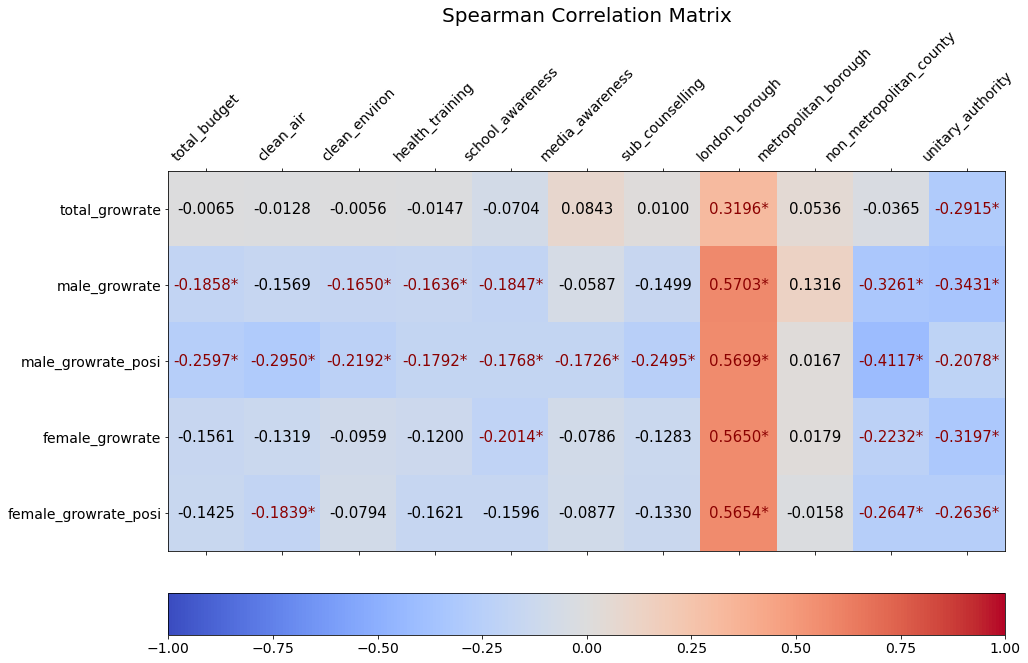

In [98]:
# plot the matrix, both showing the magnitude via color and values of coefficient of correlation and mark p-value < 0.05
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(15, 15))
plt.matshow(spcor.T, fignum=f.number, cmap = 'coolwarm')
plt.xticks(range(spcor.shape[0]), spcor.index, fontsize=14, rotation=45)
plt.yticks(range(spcor.shape[1]), spcor.columns, fontsize=14)

cb = plt.colorbar(orientation='horizontal', pad = 0.05)
cb.ax.tick_params(labelsize=14)
plt.clim(-1,1)
plt.title("Spearman Correlation Matrix", fontsize=20)
for i in range(spcor.shape[0]):
    for j in range(spcor.shape[1]):
        if sppvalue.iloc[i,j] > 0.05:
            text = plt.text(i, j, format(spcor.iloc[i, j], '.4f'),
                            ha = 'center', va = 'center', color = 'black', fontsize=15)
        elif sppvalue.iloc[i,j] <= 0.05:
            text = plt.text(i, j, format(spcor.iloc[i, j], '.4f') + '*',
                            ha = 'center', va = 'center', color = 'darkred', fontsize=15)
        else:
            text = plt.text(i, j, 'Null',
                            ha = 'center', va = 'center', color = 'black', fontsize=15)

plt.savefig('Correlation Matrix Spearman')


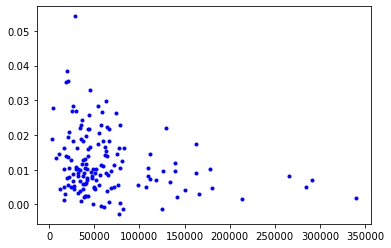

In [99]:
# generate scarters to see the potential relationship
plt.plot(df_growrate['school_awareness'],df_growrate['female_growrate'], 'b.')

In [100]:
# define a function to help creating subplots of log-log linear regression models
def add_log_regression_subplot(x_values, y_values, r, c, plt_index, x_label = None, y_label = None, title = None):
    ax = fig.add_subplot(r, c, plt_index)
    X_values = sm.add_constant(x_values)
    regression_model_a = sm.OLS(y_values, X_values)
    regression_model_b = regression_model_a.fit()
    gradient  = regression_model_b.params[1]
    intercept = regression_model_b.params[0]
    Rsquared  = regression_model_b.rsquared
    MSE       = regression_model_b.mse_resid
    pvalue    = regression_model_b.f_pvalue
    x_lobf = [min(x_values), max(x_values)]
    y_lobf = [x_lobf[0]*gradient + intercept, x_lobf[1]*gradient + intercept]
    plt.xlabel(x_label, fontsize = 10)
    plt.ylabel(y_label, fontsize =10)
    plt.title(title)
    plt.plot(x_values,y_values, 'bx',x_lobf,y_lobf,'r--')
    R2 = 'R2=' + str("%.2f" % Rsquared)
    if intercept >= 0:
        function = 'log(y)='+ str("%.2f" % gradient) + '*log(x)+' + str("%.2f" % intercept)
        plt.text(min(x_values), min(y_values)+0.2, function + '   ' +R2, alpha = 0.9, fontsize = 10)
    elif intercept < 0:
        function = 'log(y)='+ str("%.2f" % gradient) + '*log(x)' + str("%.2f" % intercept)
        plt.text(min(x_values), min(y_values)+0.2, function + '   ' +R2, alpha = 0.9, fontsize = 10)




/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/

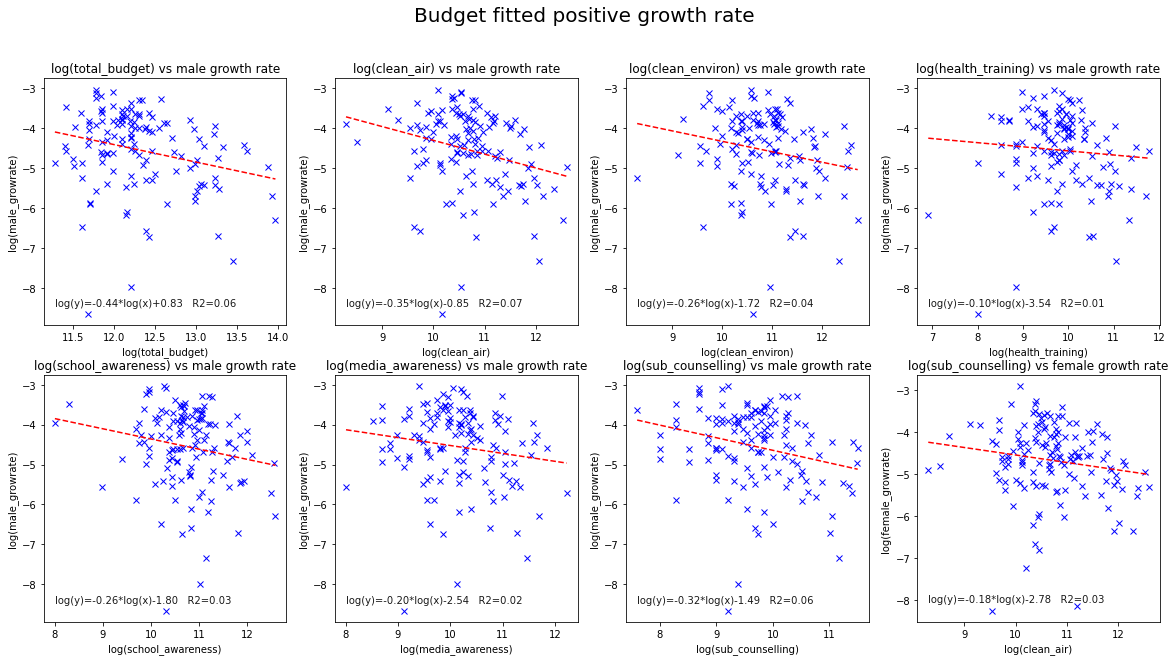

In [101]:
# plot the regression models; all selected positive ARG
fig = plt.figure(figsize = (20,10))
for i in range(3, 10):
    x = np.log(df_growrate[df_growrate['male_growrate']>0].iloc[:,i])
    y = np.log(df_growrate[df_growrate['male_growrate']>0]['male_growrate'])
    xlabel1 = 'log(' + col[i] + ')'
    ylabel1 = 'log(male_growrate)'
    add_log_regression_subplot(x, y, 2,4,i-2,xlabel1, ylabel1,'log('+col[i]+') vs male growth rate')
x = np.log(df_growrate[df_growrate['female_growrate']>0].iloc[:,4])
y = np.log(df_growrate[df_growrate['female_growrate']>0]['female_growrate'])
xlabel2 = 'log(' + col[4] + ')'
ylabel2 = 'log(female_growrate)'
add_log_regression_subplot(x, y, 2,4,8,xlabel2, ylabel2,'log('+col[i]+') vs female growth rate')
plt.suptitle('Budget fitted positive growth rate', fontsize = 20)
plt.savefig('Budget fitted positive growth rate')


In [102]:
# define a function to help creating subplots of OLS simple regression
def add_regression_subplot(x_values, y_values, r, c, plt_index, x_label = None, y_label = None, title = None):
    ax = fig.add_subplot(r, c, plt_index)
    X_values = sm.add_constant(x_values)
    regression_model_a = sm.OLS(y_values, X_values)
    regression_model_b = regression_model_a.fit()
    gradient  = regression_model_b.params[1]
    intercept = regression_model_b.params[0]
    Rsquared  = regression_model_b.rsquared
    MSE       = regression_model_b.mse_resid
    pvalue    = regression_model_b.f_pvalue
    x_lobf = [min(x_values), max(x_values)]
    y_lobf = [x_lobf[0]*gradient + intercept, x_lobf[1]*gradient + intercept]
    plt.xlabel(x_label, fontsize = 10)
    plt.ylabel(y_label, fontsize =10)
    plt.title(title)
    plt.plot(x_values,y_values, 'bx',x_lobf,y_lobf,'r--')
    R2 = 'R2=' + str("%.2f" % Rsquared)
    if intercept >= 0:
        function = 'y=' + str("%.2f" % gradient) + '*x' + str("%.2f" % intercept)
        plt.text(min(x_values)+0.1, min(y_values), function + '   ' +R2, alpha = 0.9, fontsize = 10)
    elif intercept < 0:
        function = 'y=' + str("%.2f" % gradient) +'*x-'+ str("%.2f" % intercept)
        plt.text(min(x_values)+0.1, min(y_values), function + '   ' +R2, alpha = 0.9, fontsize = 10)



/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/

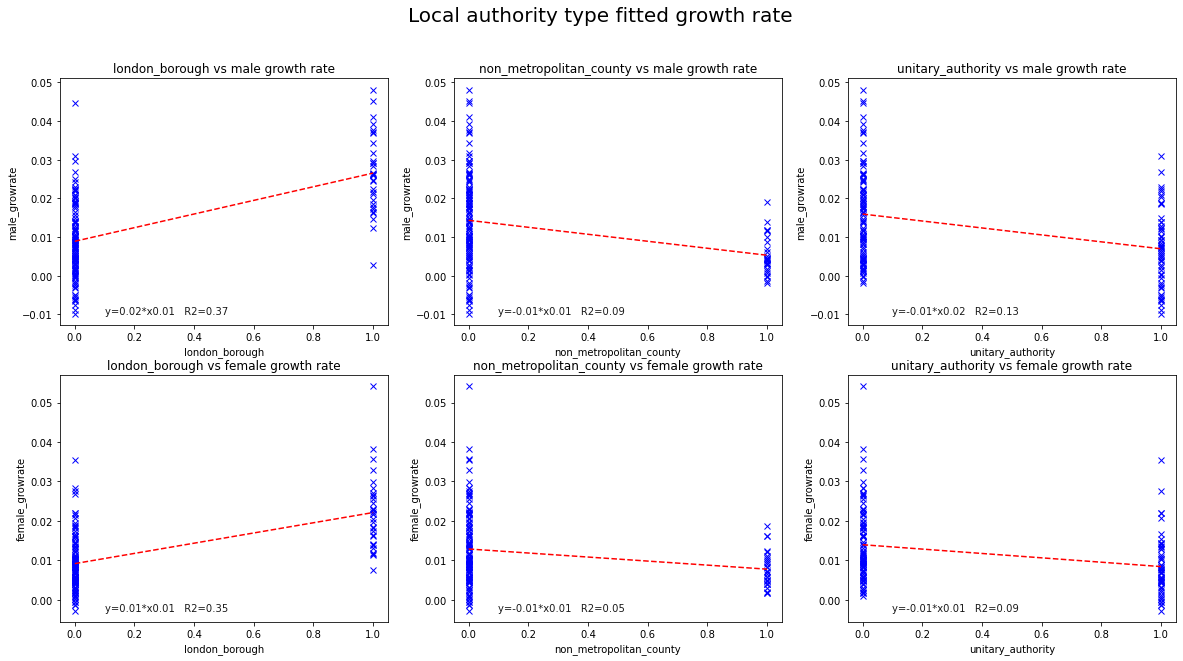

In [103]:
# plot the regression models; see relationship between local authority types and ARG
fig = plt.figure(figsize = (20,10))
col2 = ['london_borough', 'non_metropolitan_county', 'unitary_authority']
for i in range(0,3):
    x = df_growrate[col2[i]]
    y = df_growrate['male_growrate']
    xlabel1 = col2[i]
    ylabel1 = 'male_growrate'
    add_regression_subplot(x, y, 2,3,i+1,xlabel1, ylabel1,col2[i]+' vs male growth rate')
for i in range(0,3):
    x = df_growrate[col2[i]]
    y = df_growrate['female_growrate']
    xlabel1 = col2[i]
    ylabel1 = 'female_growrate'
    add_regression_subplot(x, y, 2,3,i+4,xlabel1, ylabel1,col2[i]+' vs female growth rate')

plt.suptitle('Local authority type fitted growth rate', fontsize = 20)
plt.savefig('Local authority type fitted growth rate')


In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


def drop_column_using_vif_(df, thresh=5):
    """
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    """
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series(
            [variance_inflation_factor(df_with_const.values, i)
                for i in range(df_with_const.shape[1])], name="VIF",
            index=df_with_const.columns,
        ).to_frame()

        # drop the const
        vif_df = vif_df.drop("const")

        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print("Dropping: {}".format(index_to_drop))
            df = df.drop(columns=index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [105]:
male_posi = df_growrate[df_growrate['male_growrate']>0][['male_growrate', 'total_budget', 'clean_air', 'clean_environ',
                                                        'health_training','school_awareness', 'media_awareness', 'sub_counselling',
                                                        'london_borough', 'metropolitan_borough',
                                                        'non_metropolitan_county', 'unitary_authority']]

model_male_posi = sm.formula.ols(
    "male_growrate ~ total_budget + clean_air + clean_environ + health_training + school_awareness + media_awareness + sub_counselling + london_borough + metropolitan_borough + non_metropolitan_county + unitary_authority",
    male_posi,
).fit()
model_male_posi.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          male_growrate   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     11.00
Date:                Sun, 14 Nov 2021   Prob (F-statistic):           2.16e-12
Time:                        22:43:19   Log-Likelihood:                 447.05
No. Observations:                 131   AIC:                            -874.1
Df Residuals:                     121   BIC:                            -845.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.0130      0.001      8.732      0.000       0.010       0.016
total_budget            -3.711e-09   8.68e-09     -0.427      0.670   -2.09e-08    1.35e-08
clean_air               -6.182e-09   2.71e-08     -0.228      0.820   -5.99e-08    4.75e-08
clean_environ           -3.546e-09   2.42e-08     -0.147      0.884   -5.14e-08    4.43e-08
health_training         -3.937e-08   5.18e-08     -0.760      0.449   -1.42e-07    6.31e-08
school_awareness        -1.837e-08   2.78e-08     -0.661      0.510   -7.34e-08    3.67e-08
media_awareness           6.38e-08    4.2e-08      1.519      0.131   -1.94e-08    1.47e-07
sub_counselling         -4.319e-11   6.63e-08     -0.001      0.999   -1.31e-07    1.31e-07
london_borough              0.0148      0.001     11.020      0.000       0.012       0.017
metropolitan_borough        0.0029      0.001      2.314      0.022       0.000       0.005
non_metropolitan_county    -0.0036      0.003     -1.403      0.163      -0.009       0.001
unitary_authority          -0.0010      0.001     -0.829      0.409      -0.003       0.001
==============================================================================
Omnibus:                        9.883   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.898
Skew:                           0.519   Prob(JB):                      0.00430
Kurtosis:                       3.958   Cond. No.                     4.38e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.24e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [106]:
male_posi_selected_VIF = drop_column_using_vif_(
    male_posi.drop("male_growrate", axis=1)
)
print("The columns remaining after VIF selection are:")
print(male_posi_selected_VIF.columns)

Dropping: total_budget
Dropping: london_borough
The columns remaining after VIF selection are:
Index(['clean_air', 'clean_environ', 'health_training', 'school_awareness',
       'media_awareness', 'sub_counselling', 'metropolitan_borough',
       'non_metropolitan_county', 'unitary_authority'],
      dtype='object')


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [107]:
model_male_posi_new = sm.OLS(endog=male_posi[['male_growrate']], exog=sm.add_constant(male_posi_selected_VIF)).fit()
model_male_posi_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          male_growrate   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     11.00
Date:                Sun, 14 Nov 2021   Prob (F-statistic):           2.16e-12
Time:                        22:43:19   Log-Likelihood:                 447.05
No. Observations:                 131   AIC:                            -874.1
Df Residuals:                     121   BIC:                            -845.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0278      0.002     15.177      0.000       0.024       0.031
clean_air               -9.892e-09   2.58e-08     -0.384      0.702   -6.09e-08    4.11e-08
clean_environ           -7.256e-09   2.02e-08     -0.360      0.720   -4.72e-08    3.27e-08
health_training         -4.308e-08   5.41e-08     -0.796      0.428    -1.5e-07    6.41e-08
school_awareness        -2.208e-08    2.5e-08     -0.883      0.379   -7.16e-08    2.74e-08
media_awareness          6.009e-08   4.23e-08      1.419      0.158   -2.37e-08    1.44e-07
sub_counselling         -3.754e-09   7.15e-08     -0.052      0.958   -1.45e-07    1.38e-07
metropolitan_borough       -0.0118      0.002     -5.791      0.000      -0.016      -0.008
non_metropolitan_county    -0.0184      0.003     -5.498      0.000      -0.025      -0.012
unitary_authority          -0.0158      0.002     -7.868      0.000      -0.020      -0.012
==============================================================================
Omnibus:                        9.883   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.898
Skew:                           0.519   Prob(JB):                      0.00430
Kurtosis:                       3.958   Cond. No.                     7.46e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

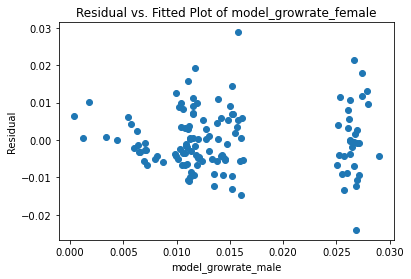

In [108]:
# plot
plt.scatter(model_male_posi.fittedvalues, model_male_posi.resid)
# adding title and labels
plt.xlabel("model_growrate_male")
plt.ylabel("Residual")
plt.title("Residual vs. Fitted Plot of model_growrate_female")
plt.show()

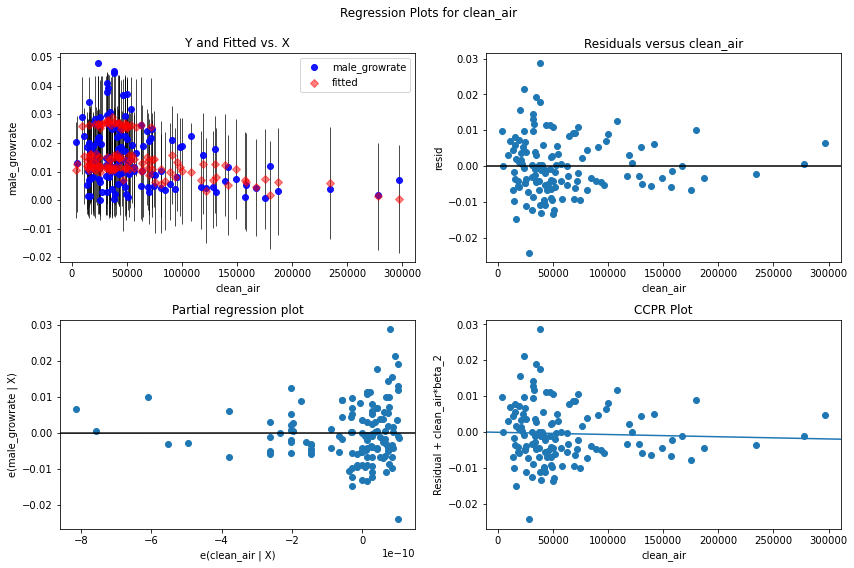

In [279]:
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_regress_exog(model_male_posi, "clean_air", fig=fig)

#fig.savefig('regression plots for clean_air')